In [2]:
import pandas as pd

In [61]:
from sklearn.metrics import roc_curve
import numpy as np

def compute_best_threshold(
    df_gt_col: list[float], 
    df_pred_col: list[float],
) -> float:
    """
    Compute the optimal threshold for classification
    
    Args:
        df_gt_col: Ground truth labels
        df_pred_col: Predicted probabilities
        task_type: Type of classification task ('binary' or 'multiclass')
    
    Returns:
        float: Optimal threshold
    """
    fpr, tpr, thresholds = roc_curve(df_gt_col, df_pred_col)
    # Find threshold that maximizes TPR - FPR
    optimal_idx = np.argmax(tpr - fpr)
    return float(thresholds[optimal_idx])
    
def predict_main_structure(probabilities: np.ndarray) -> str:
    """
    Convert probabilities to class prediction for main structure
    
    Args:
        probabilities: Array of probabilities for each class
        
    Returns:
        str: Predicted class name
    """
    class_names = ['Left Coronary', 'Right Coronary', 'Graft', 'Catheter', 'Femoral']
    return class_names[np.argmax(probabilities)]

In [65]:
df_train = pd.read_csv('outputs/dev_deep_coro_linear_probing/mvit_pretrained_mvit_b4_f16_AdamW_lr0.0003_20250305-173253_zk0a2m13/predictions/train_predictions_epoch_4.csv')
df_val = pd.read_csv('outputs/dev_deep_coro_linear_probing/mvit_pretrained_mvit_b4_f16_AdamW_lr0.0003_20250305-173253_zk0a2m13/predictions/val_predictions_epoch_4.csv')

heads = ['contrast_agent', 'stent_presence']

prob_columns = ['main_structure_prob_Left Coronary', 'main_structure_prob_Right Coronary', 
                'main_structure_prob_Graft', 'main_structure_prob_Catheter', 
                'main_structure_prob_Femoral']

probabilities = df_val[prob_columns].values
predictions = [predict_main_structure(row) for row in probabilities]

for head in heads:
    best_threshold = compute_best_threshold(df_train[f"{head}_true"], df_train[f"{head}_pred"])
    df_val[f"{head}_pred"] = (df_val[f"{head}_pred"] > best_threshold).astype(int)
    print(f"Best threshold for {head}: {best_threshold}")
    

Best threshold for contrast_agent: 0.7676898
Best threshold for stent_presence: 0.4139509


Head: contrast_agent
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
Head: stent_presence
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


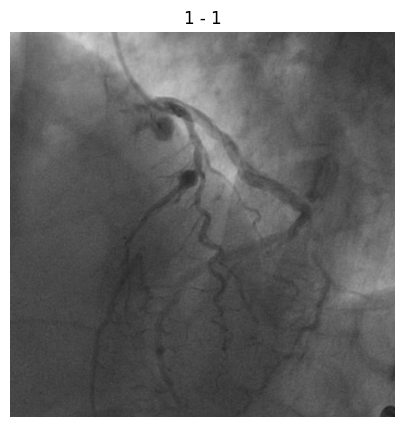

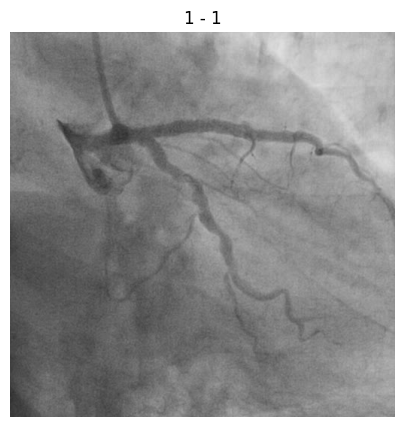

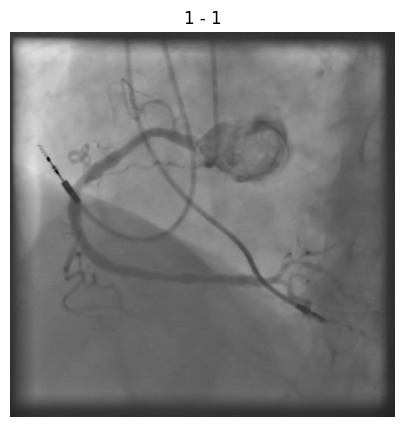

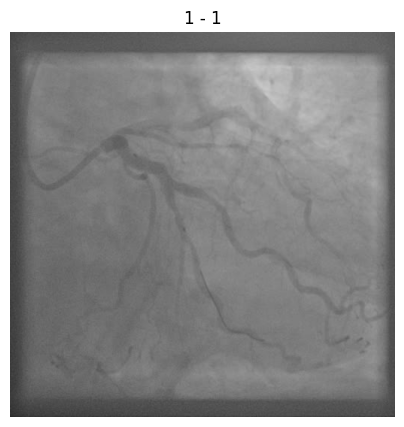

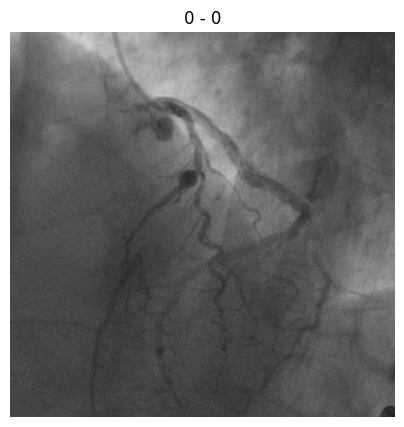

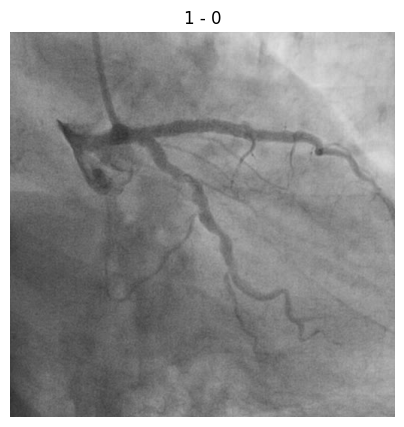

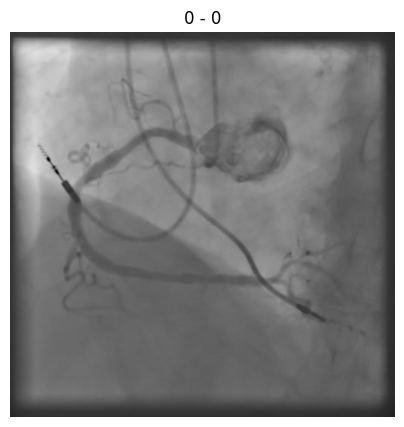

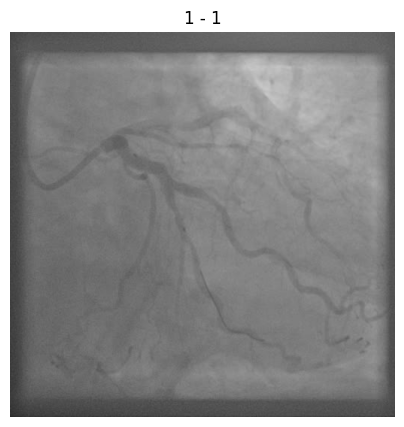

In [57]:
import os 
import sys

sys.path.append(os.path.dirname(os.path.abspath("/volume/DicomVideoProcessing/downloadAvi")))

from downloadAvi import plot_avi

random_rows = df_val.sample(n=4)

for head in heads:
    print(f"Head: {head}")
    for index, random_row in random_rows.iterrows():
        row_df = pd.DataFrame([random_row]) 
        plot_avi.sample_and_plot_middle_frames(
            row_df, N=1, 
            label_column=f'{head}_pred', 
            second_label_column=f'{head}_true',
            path_column='video_name'
        )


437